In [1]:
################################## T A R E A   F I N A L ###################################################
# Objetivo: Desarrollar un modelo que funcione lo mejor posible y que sea capaz de identificar si un paciente tiene o no cáncer,
# con el dataset que se encuentra en este link: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
#
# DESARROLLO:
# Se usan tres modelos de aprendizaje que estan en este orden: Random_Forest, SVM(Support Vector Machines) y Regresión
# Lineal; cada uno está comentariado y separado para que sea lo mas entendible posible.
# Se realiza el procesamiento de datos.
# Cada modelo tiene sus matrices de confusión de TRAIN y TEST, se ajustaron los parámetros lo mejor posible con el objetivo de
# de que el modelo sea el mas adecuado; una de las premisas es que los falsos-negativos hay que minimizarlos porque podría
# llevar a daños graves, incluido la muerte del paciente.
#
# RESULTADO:
# Luego de evaluar los 3 modelos, el que tiene el mejor resultado es el de RandomForest cuyo accuracy = 97%, y es el que generó
# la menor cantidad de falsos-negativos tanto TRAIN como en TEST
###########################################################################################################
#
# Cargamos las librerias necesarias.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

In [2]:
# # En el sitio https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic se encuetra la información y el dataset,
# se procede a descargarlos y descomprimirlo. El archivo de datos es wdbc.data, el mismo que no contiene una cabecera con la identificación
# de los campos, se añade la cabecera con la información que se muestra en el sitio y se genera el archivo wdbc_data.csv para utilizarlo.
# Cargamos los datos al dataframe bcw(Breast Cancer Wisconsin)
bcw = pd.read_csv('wdbc_data.csv')

In [3]:
#Revisamos la info del dataframe para saber que clase de información contienen los diferentes campos y el tamaño
bcw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [4]:
#Eliminamos el campo ID porque es un identificador de registros y no le agrega valor a los modelos que se van a generar
bcw = bcw.drop('ID', axis=1)
print(bcw)

    Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0           M    17.99     10.38      122.80  1001.0      0.11840   
1           M    20.57     17.77      132.90  1326.0      0.08474   
2           M    19.69     21.25      130.00  1203.0      0.10960   
3           M    11.42     20.38       77.58   386.1      0.14250   
4           M    20.29     14.34      135.10  1297.0      0.10030   
..        ...      ...       ...         ...     ...          ...   
564         M    21.56     22.39      142.00  1479.0      0.11100   
565         M    20.13     28.25      131.20  1261.0      0.09780   
566         M    16.60     28.08      108.30   858.1      0.08455   
567         M    20.60     29.33      140.10  1265.0      0.11780   
568         B     7.76     24.54       47.92   181.0      0.05263   

     compactness1  concavity1  concave_points1  symmetry1  ...  radius3  \
0         0.27760     0.30010          0.14710     0.2419  ...   25.380   
1         0.07864    

<Axes: >

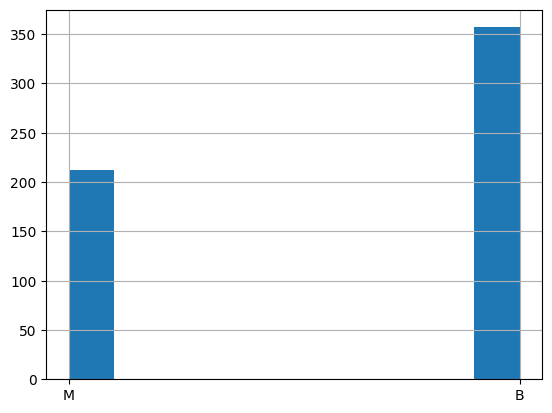

In [5]:
#Miramos un histograma de la etiqueta Diagnosis (M = maligno, B = benigno)
#Hay una cantidad mayor de instancias de casos benignos que malignos
bcw['Diagnosis'].hist()

In [6]:
#Miramos si existen valores nulos
bcw.isna().any().any()

False

In [7]:
#Con el 'describe' vemos que existen 569 registros. Hay 30 parámetros que nos aportarán información para crear el modelo.
bcw.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#Generamos el vector "X" con los campos radius1, texture1...fractal_dimension3 y el "y" que sería solo la etiqueta Diagnosis (M, B)
X = bcw.drop('Diagnosis', axis=1)
y = bcw['Diagnosis']

In [9]:
#Se divide el conjunto de datos en datos de entrenamiento(TRAIN) y prueba(TEST)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
#Desplegamos conjunto de datos para entrenamiento
X_train

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [11]:
#Desplegamos el conjunto de datos para test o pruebas.
X_test

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


In [12]:
#Etiquetas para los ejes de las matrices de confusión
etiqueta = ['Benigno','Maligno']

In [13]:
########################################
# ENTRENAMIENTO del modelo RandomForest#
########################################
modelo_rf = RandomForestClassifier(n_estimators=33, random_state=42, max_depth = 5, max_features=3)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=3, n_estimators=33,
                       random_state=42)

In [14]:
#Predecir los resultados para el conjunto de TEST.
y_pred = modelo_rf.predict(X_test)

#Informe de clasificación, Accuracy con mas decimales y matriz de confusión
print(classification_report(y_test, y_pred))
print(f'Accuracy (exactitud): {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy (exactitud): 0.9736842105263158
[[70  1]
 [ 2 41]]


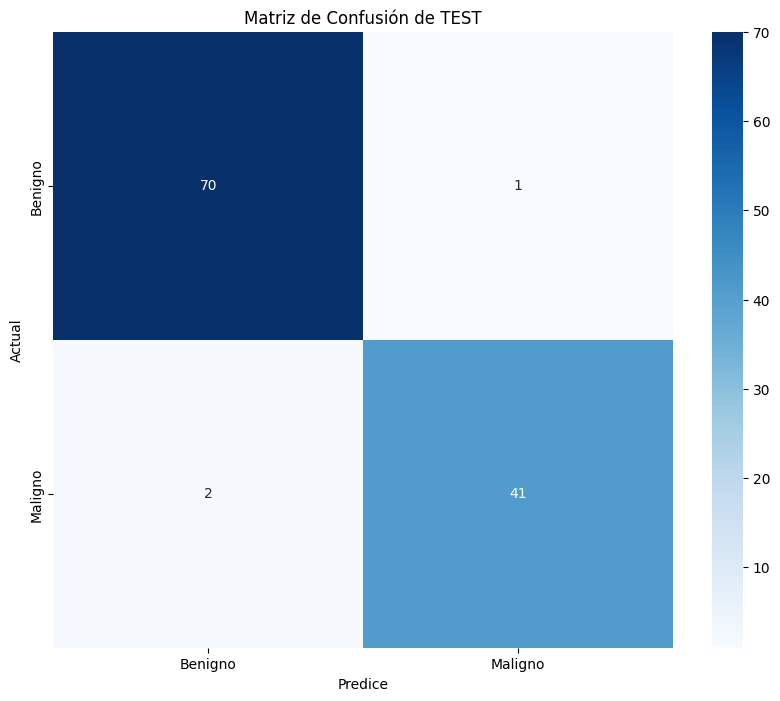

In [15]:
# Dibujar la matriz de confusión de TEST
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predice')
plt.ylabel('Actual')
plt.title('Matriz de Confusión de TEST')
plt.show()

              precision    recall  f1-score   support

           B       0.99      1.00      0.99       286
           M       1.00      0.98      0.99       169

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

Accuracy (exactitud): 0.9934065934065934
[[286   0]
 [  3 166]]


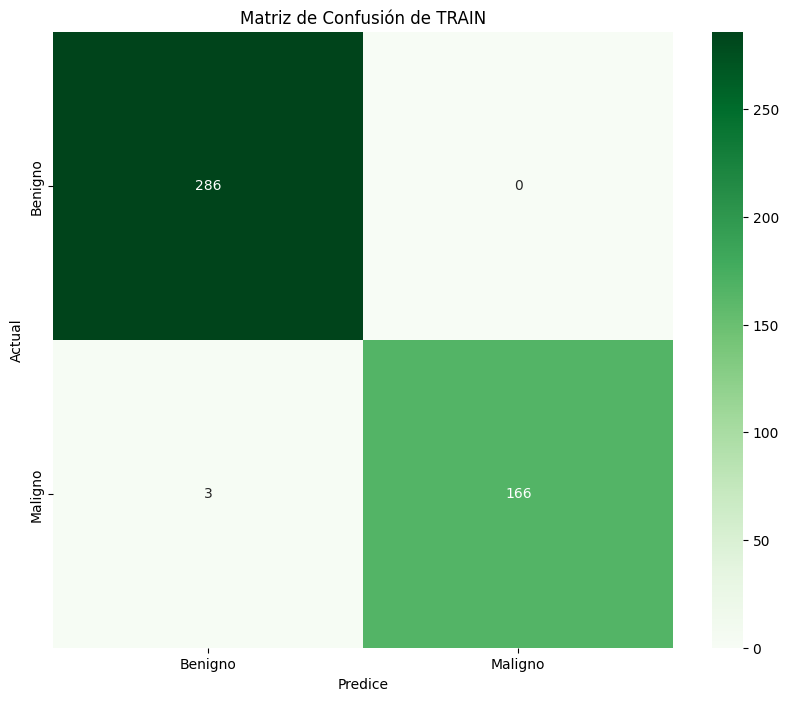

In [16]:
#Predecir los resultados para el conjunto de TRAIN.
y_pred = modelo_rf.predict(X_train)

#Informe de clasificación y matriz de confusión
print(classification_report(y_train, y_pred))
print(f'Accuracy (exactitud): {accuracy_score(y_train, y_pred)}')
print(confusion_matrix(y_train, y_pred))

# Dibujar la matriz de confusión, en donde  0 = Benigno y 1 = Maligno
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Greens', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predice')
plt.ylabel('Actual')
plt.title('Matriz de Confusión de TRAIN')
plt.show()

In [17]:
######################### F I N ##### R A N D O M   F O R E S T ####################################

In [18]:
##################################################################
#    ENTRENAMIENTO del modelo SVM (Support Vector Machines)      #
##################################################################
#Kernel='poly' le toma mas tiempo respecto que las otras opciones#
#pero tiene un mejor resultado.                                  #
modelo_svc = SVC(C=1.0, kernel='poly', gamma = 0.001)
modelo_svc.fit(X_train, y_train)

SVC(gamma=0.001, kernel='poly')

In [19]:
#Predecir los resultados para el conjunto de TEST.
y_pred = modelo_svc.predict(X_test)

#Informe de clasificación y matriz de confusión
print(classification_report(y_test, y_pred))
print(f'Accuracy (exactitud): {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.99      0.96        71
           M       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy (exactitud): 0.9473684210526315
[[70  1]
 [ 5 38]]


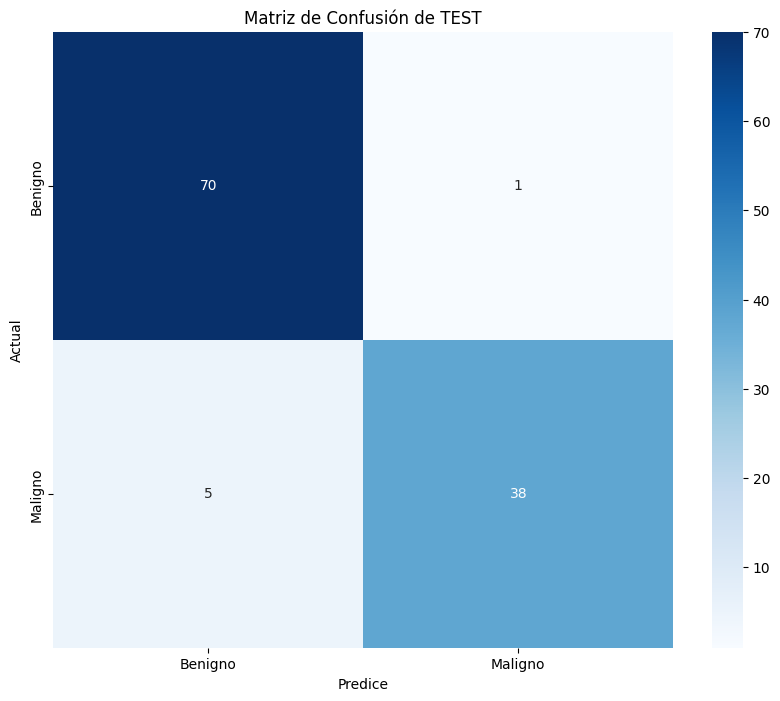

In [20]:
# Dibujar la matriz de confusión de TEST
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predice')
plt.ylabel('Actual')
plt.title('Matriz de Confusión de TEST')
plt.show()

              precision    recall  f1-score   support

           B       0.98      0.98      0.98       286
           M       0.97      0.97      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

Accuracy (exactitud): 0.978021978021978
[[281   5]
 [  5 164]]


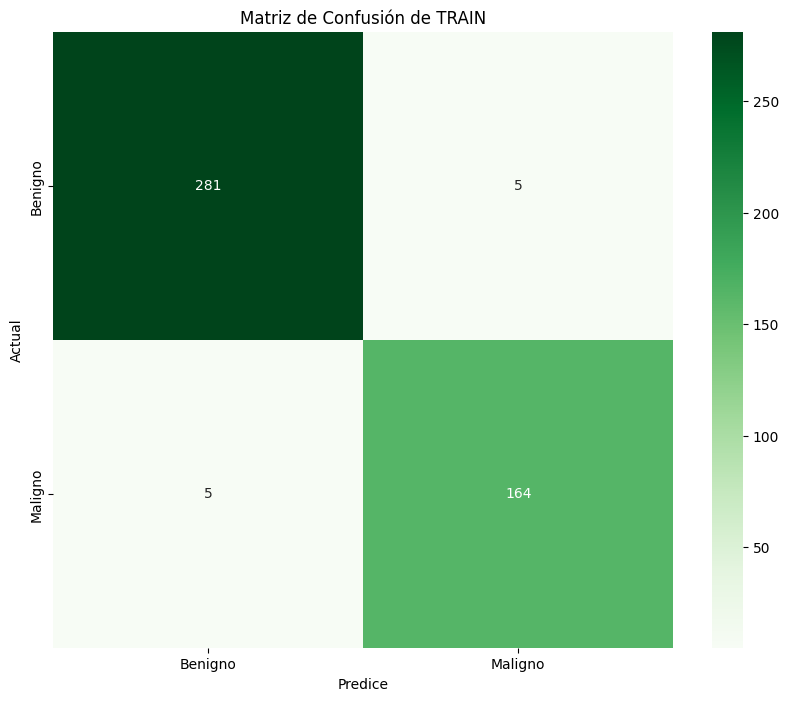

In [21]:
#Predecir los resultados para el conjunto de TRAIN.
y_pred = modelo_svc.predict(X_train)

#Informe de clasificación y matriz de confusión
print(classification_report(y_train, y_pred))
print(f'Accuracy (exactitud): {accuracy_score(y_train, y_pred)}')
print(confusion_matrix(y_train, y_pred))

# Dibujar la matriz de confusión, en donde  0 = Benigno y 1 = Maligno
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Greens', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predice')
plt.ylabel('Actual')
plt.title('Matriz de Confusión de TRAIN')
plt.show()

In [22]:
####################### F I N ##### SVM (Support Vector Machines) ##################################

In [23]:
################################################################
#         ENTRENAMIENTO del modelo Regresión Logistica         #
################################################################
#C=0.01 se trata de evitar el sobreajuste y tener una regulari-#
#zación mas fuerte.                                            #
modelo_rl = LogisticRegression(C=0.01, max_iter=1000)
modelo_rl.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000)

In [24]:
#Predecir los resultados para el conjunto de TEST.
y_pred = modelo_rl.predict(X_test)

#Informe de clasificación y matriz de confusión
print(classification_report(y_test, y_pred))
print(f'Accuracy (exactitud): {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy (exactitud): 0.9649122807017544
[[70  1]
 [ 3 40]]


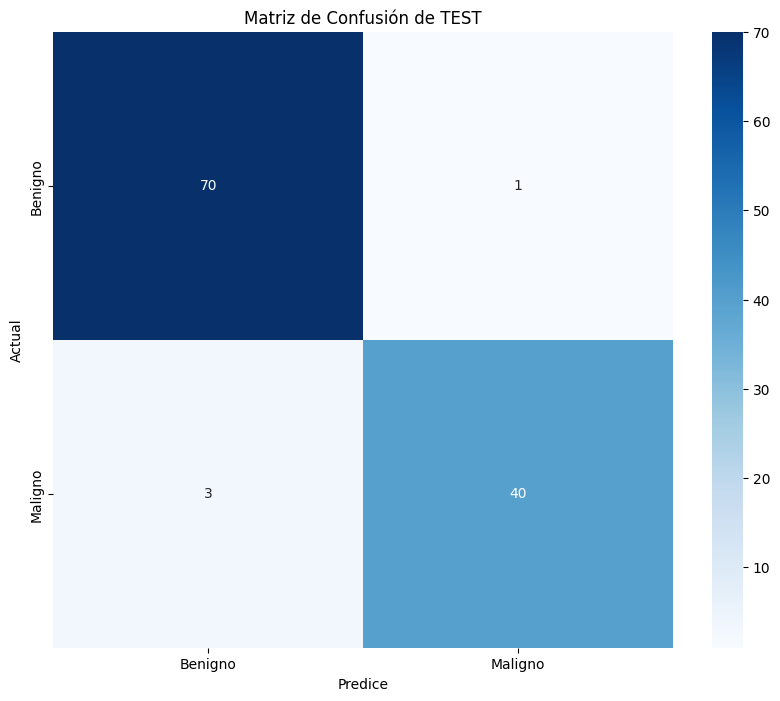

In [25]:
# Dibujar la matriz de confusión de TEST
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predice')
plt.ylabel('Actual')
plt.title('Matriz de Confusión de TEST')
plt.show()

              precision    recall  f1-score   support

           B       0.96      0.97      0.96       286
           M       0.95      0.92      0.93       169

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455

Accuracy (exactitud): 0.9516483516483516
[[277   9]
 [ 13 156]]


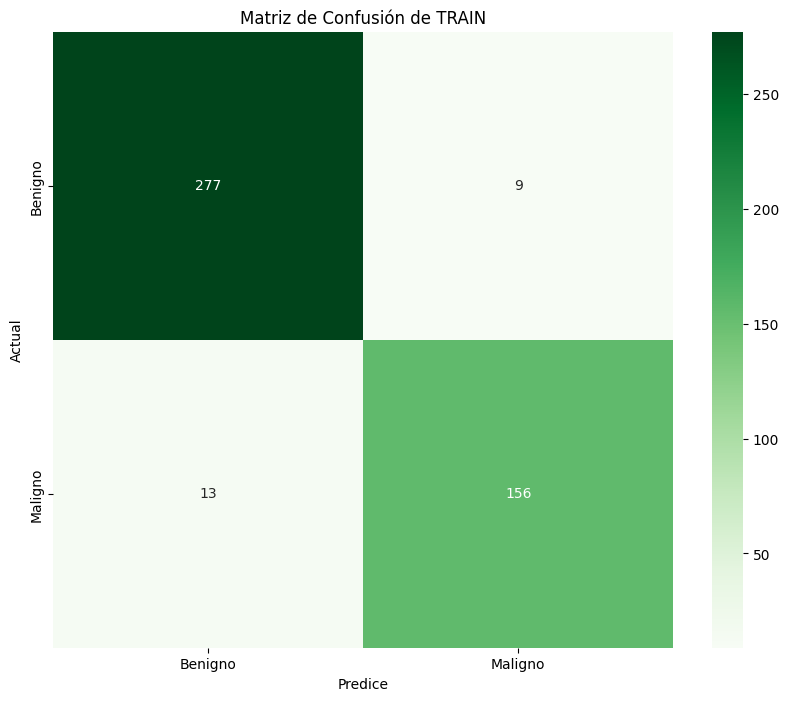

In [26]:
#Predecir los resultados para el conjunto de TRAIN.
y_pred = modelo_rl.predict(X_train)

#Informe de clasificación y matriz de confusión
print(classification_report(y_train, y_pred))
print(f'Accuracy (exactitud): {accuracy_score(y_train, y_pred)}')
print(confusion_matrix(y_train, y_pred))

# Dibujar la matriz de confusión, en donde  0 = Benigno y 1 = Maligno
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Greens', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predice')
plt.ylabel('Actual')
plt.title('Matriz de Confusión de TRAIN')
plt.show()

In [ ]:
##################### F I N ##### R E G R E S I O N   L O G I S T I C A ############################